In [170]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn, sklearn.datasets, sklearn.preprocessing
from sklearn.model_selection import train_test_split

0.3823505640366985


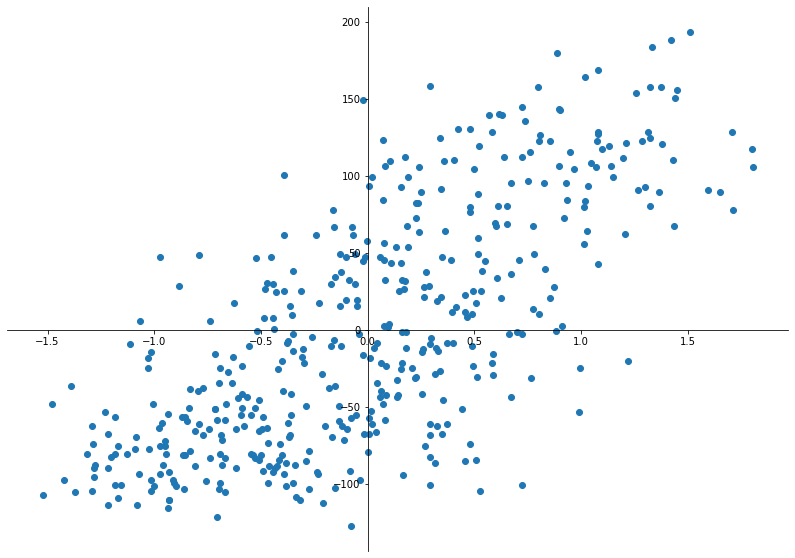

In [196]:
diabetes = sklearn.datasets.load_diabetes(as_frame=True)

X = np.array(diabetes.data)
y = np.array(diabetes.target)
y = y.reshape(-1, 1)

scaler_X = sklearn.preprocessing.StandardScaler().fit(X)
scaler_y = sklearn.preprocessing.StandardScaler().fit(y)
X = scaler_X.transform(X)
y = scaler_y.transform(y)

X = np.hstack([X, X**2, np.sin(X), np.cos(X), np.exp(X), np.abs(X), np.sqrt(np.abs(X)), np.sin(4*X), np.sin(10*X)])



beta = np.linalg.solve(X.T @ X, X.T @ y)
y_hat = X @ beta
MSE = np.mean((y_hat - y)**2)
relMSE = MSE / np.mean(y**2)

print(relMSE)

fig, ax = plt.subplots(figsize=(14, 10))
ax.scatter(y_hat_c, y_c)
ax.spines['bottom'].set_position("zero")
ax.spines['left'].set_position("zero")
ax.spines[['top', 'right']].set_visible(False)



In [203]:
diabetes.data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [230]:
# do a proper test-train split and show overfitting
# I am using an ugly mix of sklearn and manual numpy 
# code to show some things explicitly...

lam = 1

X = np.array(diabetes.data)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.33
    )
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


def ultrafeaturize(X, nop=False):
    if nop:
        return X
    else:
        return np.hstack([X, 
                        X**2, 
                        X**3, 
                        X**4, 
                        np.sin(X), 
                        np.cos(X), 
                        np.exp(X), 
                        np.abs(X), 
                        np.sqrt(np.abs(X)), 
                        np.sin(4*X), 
                        np.sin(10*X)
                        ]
                        )

X_train = ultrafeaturize(X_train)

scaler_X = sklearn.preprocessing.StandardScaler().fit(X_train)
scaler_y = sklearn.preprocessing.StandardScaler().fit(y_train)
X_train = scaler_X.transform(X_train)
y_train = scaler_y.transform(y_train)

beta = np.linalg.solve(lam*np.eye(X_train.shape[1]) + X_train.T @ X_train, X_train.T @ y_train)
y_hat_train = X_train @ beta

MSE_train = np.mean((y_hat_train - y_train)**2)
relMSE_train = MSE_train / np.mean(y_train**2)
print(relMSE_train)

# testing
X_test = ultrafeaturize(X_test)
X_test = scaler_X.transform(X_test)
y_test = scaler_y.transform(y_test)
y_hat_test = X_test @ beta

MSE_test = np.mean((y_hat_test - y_test)**2)
relMSE_test = MSE_test / np.mean(y_test**2)

print(relMSE_test)

0.43589076768992885
0.5149397569294832


In [218]:
X_train.shape

(44, 110)

<StemContainer object of 3 artists>

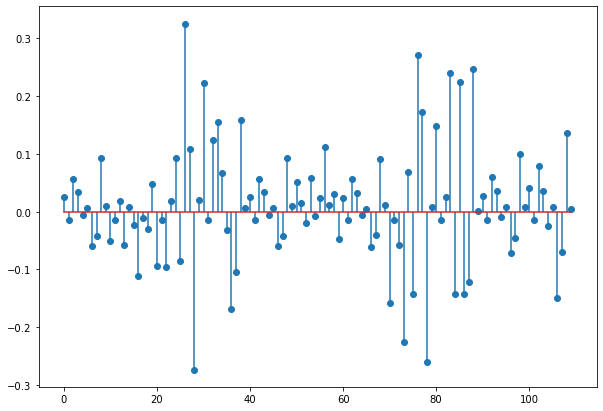

In [231]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.stem(beta)

Text(0, 0.5, '$p(x)$')

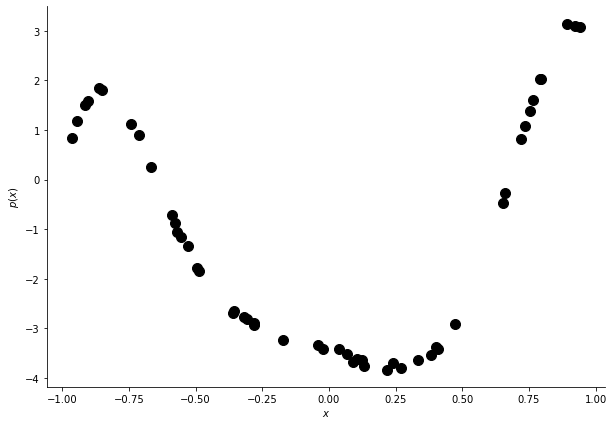

In [257]:
# polynomial interpolation

def fun(t):
    return 3*(t + 0.2)**3 - 2*(t + 0.5)**2 - 3*np.cos((2*t)**2)

N = 50
sig = 0.05

x = np.sort(np.random.rand(N)*2 - 1)
y = fun(x) + sig * np.random.randn(N)

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(x, y, 'k.', markersize=20)
ax.spines[["top", "right"]].set_visible(False)
ax.set_xlabel("$x$")
ax.set_ylabel("$p(x)$")

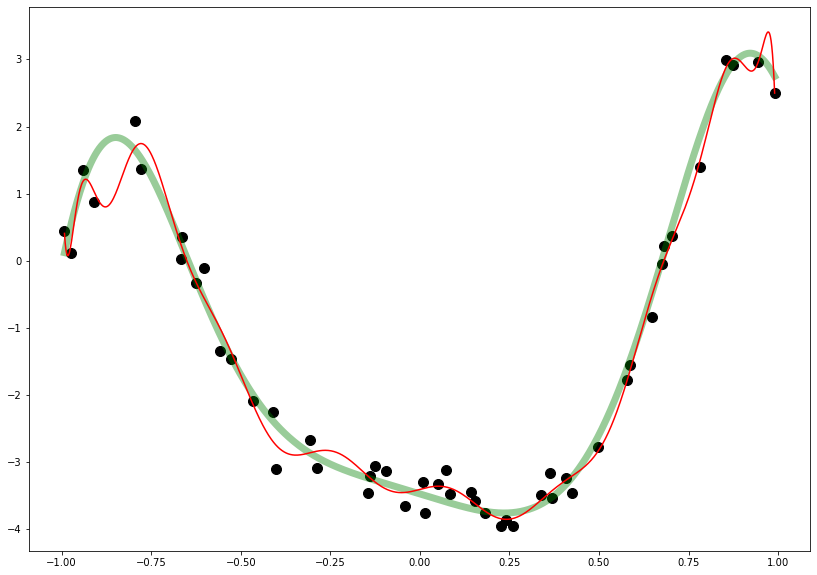

In [253]:
K = 20
x_grid = np.linspace(x.min(), x.max(), 1000)
# x_grid = np.linspace(-1, 1, 1000)

# a least-squares polynomial fit, same as above!
coeff = np.polyfit(x, y, K)
y_hat = np.poly1d(coeff)(x_grid)

fig, ax = plt.subplots(figsize=(14, 10))
ax.plot(x, y, 'k.', markersize=20)
ax.plot(x_grid, fun(x_grid), 'g', linewidth=7, alpha=0.4)
ax.plot(x_grid, y_hat, 'r')

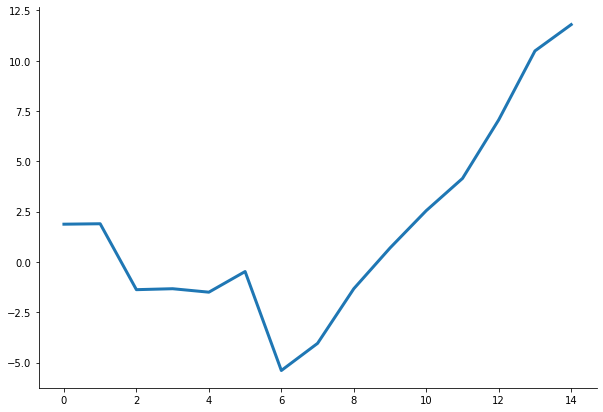

In [259]:
# crossvalidation (a clunky manual implementation)

alpha = 0.75
K_max = 15
n_folds = 6000

idx_train = np.random.randint(0, N, int(N*alpha))
idx_test = np.setdiff1d(np.arange(N), idx_train)

x_train, y_train = x[idx_train], y[idx_train]
x_test, y_test = x[idx_test], y[idx_test]


beta = 1/alpha * (1 - alpha)

mse_hat = np.zeros((K_max))
for i_fold in range(n_folds):

    idx_train_cv = np.random.randint(0, N, int(N*alpha))
    idx_validate = np.setdiff1d(np.arange(N), idx_train)

    x_train_cv, y_train_cv = x[idx_train_cv], y[idx_train_cv]
    x_validate, y_validate = x[idx_validate], y[idx_validate]

    for K in range(K_max):
        coeff = np.polyfit(x_train_cv, y_train_cv, K)
        y_hat_validate = np.poly1d(coeff)(x_validate)
        mse_hat[K] += np.mean((y_hat_validate - fun(x_validate))**2)
        
mse_hat /= n_folds

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(np.arange(K_max), np.log(mse_hat), linewidth=3)
ax.spines[["top", "right"]].set_visible(False)

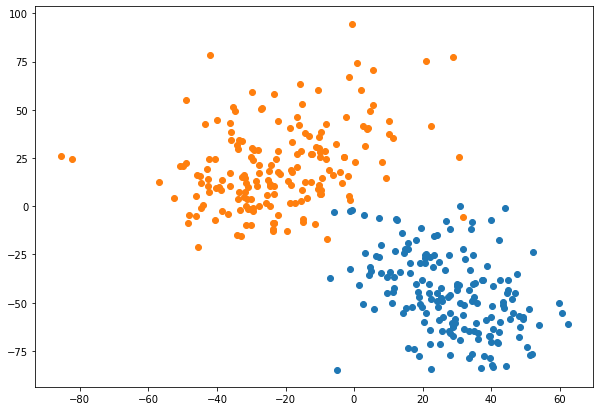

In [162]:
from sklearn.datasets import load_digits
digits = load_digits()

v1 = np.random.randn(64, 1)
v2 = np.random.randn(64, 1)

f1 = digits.data @ v1
f2 = digits.data @ v2

twos = digits.target == 2
sevens = digits.target == 7


fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(f1[twos], f2[twos])
ax.scatter(f1[sevens], f2[sevens])

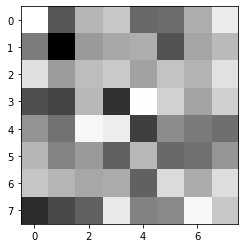

In [14]:
plt.imshow(v2.reshape((8, 8)), cmap=plt.cm.gray_r)

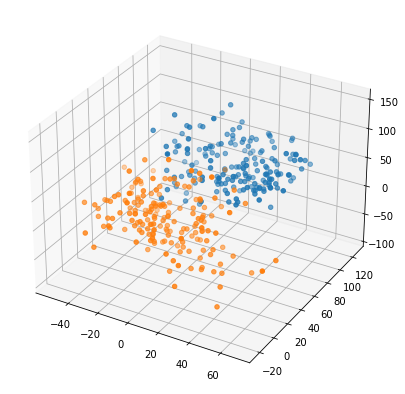

In [18]:
from mpl_toolkits import mplot3d


v1 = np.random.randn(64, 1)
v2 = np.random.randn(64, 1)
v3 = np.random.randn(64, 1)

f1 = digits.data @ v1
f2 = digits.data @ v2
f3 = digits.data @ v3

twos = digits.target == 2
sevens = digits.target == 7

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(f1[twos], f2[twos], f3[twos])
ax.scatter3D(f1[sevens], f2[sevens], f3[sevens])

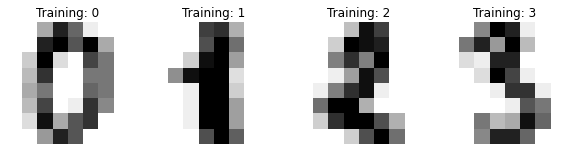

In [164]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [165]:
# flatten the images

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=True
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

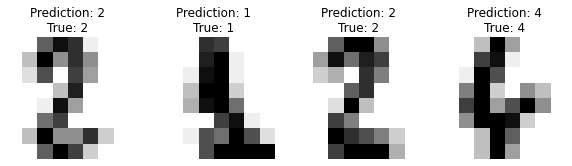

In [168]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction, gt in zip(axes, X_test, predicted, y_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f"Prediction: {prediction}\nTrue: {gt}")